In [1]:
%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import h5py
import os
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
np.seterr(divide='ignore',invalid='ignore')
pass

In [3]:
# Load the time series.
filename = "data/analysis/ts.dat/00001.00001.00001.h5"
fp = h5py.File(filename, "r")

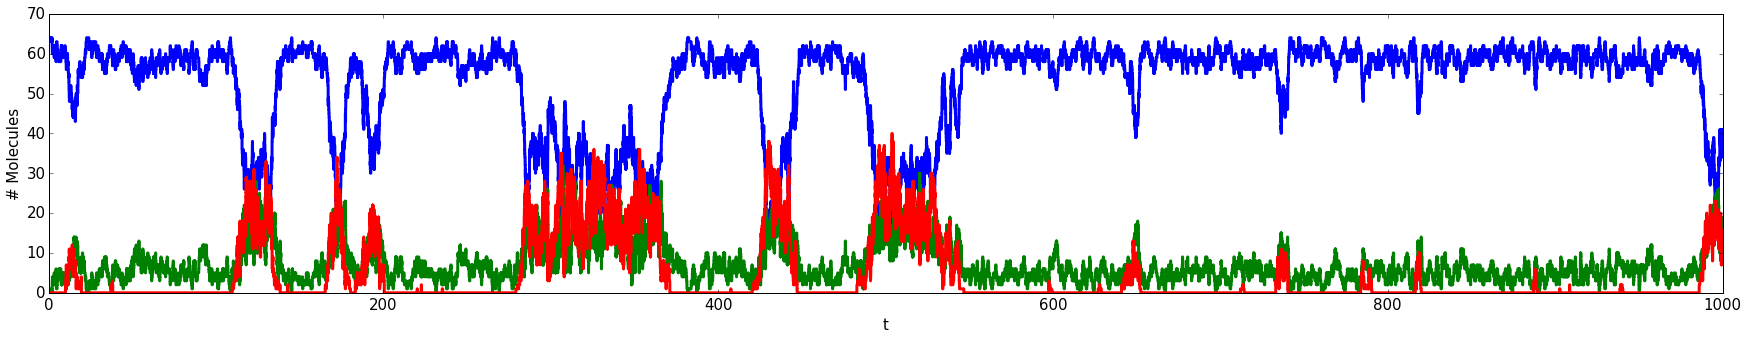

In [10]:
# Plot the time series.
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (30,5)})
replicate=5001
times=fp["/%d/Times"%replicate]
counts=fp["/%d/Counts"%replicate]
step(times[0:-1:100],counts[0:-1:100,0:3], **stepStyles)
xlabel('t'); ylabel('# Molecules')

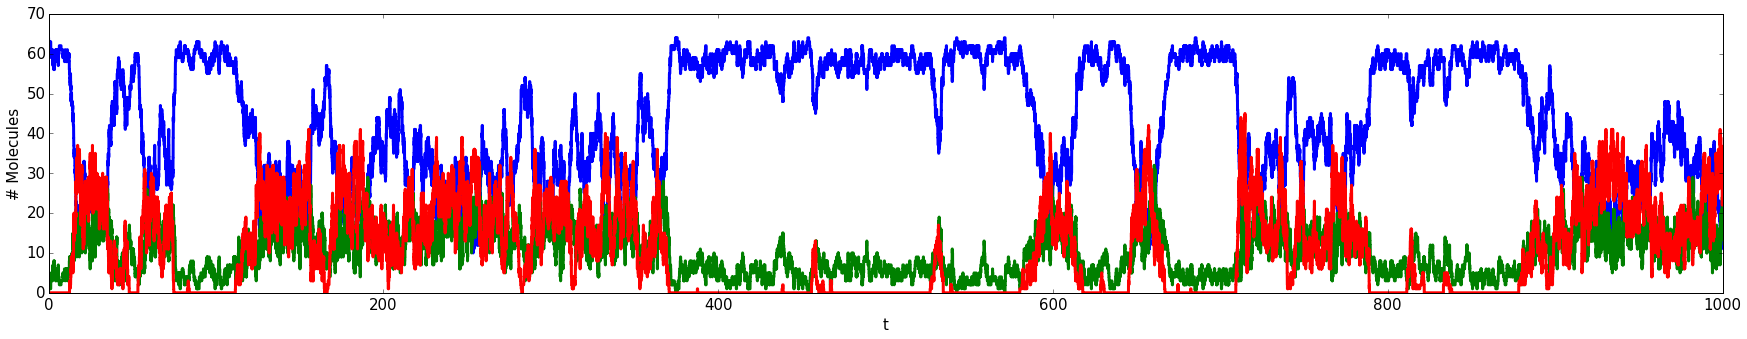

In [11]:
# Plot the time series.
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (30,5)})
replicate=5002
times=fp["/%d/Times"%replicate]
counts=fp["/%d/Counts"%replicate]
step(times[0:-1:100],counts[0:-1:100,0:3], **stepStyles)
xlabel('t'); ylabel('# Molecules')

In [7]:
print data.shape

(10000001,)


In [9]:
print data.dtype

float32


In [10]:
print type(data)

<class 'h5py._hl.dataset.Dataset'>


In [13]:
print(len(data[0:-1:100]))

100000


In [2]:
# Load the cell model.
filename = "data/lm/ts_MII_5.00e-15_gradient.lm"
fp = h5py.File(filename, "r")
latticeSitesH5=fp["/Model/Diffusion/LatticeSites"]
latticeSites = np.zeros(latticeSitesH5.shape, dtype=latticeSitesH5.dtype)
latticeSitesH5.read_direct(latticeSites)
fp.close()
membraneSites=np.argwhere(latticeSites==1)
print "%d membrane sites"%len(membraneSites)
pass

9028 membrane sites


In [20]:
# Load the time-dependent rdme pdf.
filename = "data/analysis/td_pdf_rdme.dat/00001.00001.00001.h5"
replicate=5002
dt=100.0
species=5
fp = h5py.File(filename, "r")
pdfs=fp["/%d/%0.6f/%d"%(replicate,dt,species)]
keys=pdfs.keys()
spacing=0.05

thetabins=40
thetabinwidth=(2.0*math.pi)/thetabins
zbins=25
zbinwidth=50//zbins
maxDensity=0.003
showCellOutline=True

matplotlib.rcParams.update({'font.size': 25, "figure.figsize": (30,15), "axes.titlesize": 35})

keys_f={}
for i,key in enumerate(keys):
    keys_f[float(key)] = i
sorted_keys=keys_f.keys()
sorted_keys.sort()
for i,key_f in enumerate(sorted_keys):
    key = keys[keys_f[key_f]]
    pdf = pdfs[key]
    mxs=[]
    mys=[]
    mzs=[]
    xs=[]
    ys=[]
    zs=[]
    vs=[]
    polarBins=np.zeros((zbins,thetabins), dtype=float)
    polarBinCounts=np.zeros((zbins,thetabins), dtype=int)
    for j,membraneSite in enumerate(membraneSites):
        p=tuple(membraneSite)
        mxs.append(spacing*p[0])
        mys.append(spacing*p[1])
        mzs.append(spacing*p[2])
        v = (sum(pdf[p[0],p[1],p[2],:]*range(0,pdf.shape[3])))
        if v > 0.0:
            xs.append(spacing*p[0])
            ys.append(spacing*p[1])
            zs.append(spacing*p[2])
            vs.append(v)
        theta=math.atan2(float(p[1]-25),float(p[0]-25))+math.pi
        thetabin=int(math.floor(theta/thetabinwidth))
        if thetabin == thetabins: thetabin -= 1
        zbin=p[2]//zbinwidth
        polarBins[zbin,thetabin] += v
        polarBinCounts[zbin,thetabin] += 1
    
    # Plot the cell.
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    if showCellOutline:
        ax.scatter(mxs, mys, mzs, c='k', s=10, marker='.', edgecolors='none')
    if len(xs) > 0:
        ax.scatter(xs, ys, zs, c=vs, s=150, marker='.', edgecolors='none', cmap=plt.get_cmap("jet"), norm=Normalize(0.0,maxDensity))
    ax.set_xlabel('X (um)')
    ax.set_ylabel('Y (um)')
    ax.set_zlabel('Z (um)')
    ax.invert_xaxis()
    
    # Plot the 2D histogram.
    ax = fig.add_subplot(122)
    ax.matshow(polarBins/polarBinCounts, origin='lower', extent=[-math.pi,math.pi,0,50*spacing], aspect=1.5, cmap=plt.get_cmap("jet"), norm=Normalize(0.0,maxDensity))
    ax.set_xlabel(r'$\theta$', size=40)
    ax.set_ylabel('Z (um)')
    title("Time: %0.2f s"%(float(key)))
    
    
    # Save the figure.
    if len(vs) > 0:
        print "Saving frame %d: %s, %f, %d"%(i,key,max(vs),len(vs))
    else:
        print "Saving frame %d: %s, 0.0, %d"%(i,key,len(vs))
    plt.tight_layout()
    tmpdir="figures/tmp-%d-%0.6f"%(species,dt)
    try:
        os.mkdir(tmpdir)
    except:
        pass
    savefig("%s/frame-%06d.png"%(tmpdir,i), dpi=50, bbox_inches="tight", pad_inches=0.0)
    plt.close(fig)

fp.close()
pass

Saving frame 0: 0.000000, 0.002400, 9026
Saving frame 1: 100.000000, 0.002500, 9028
Saving frame 2: 200.000000, 0.002500, 9028
Saving frame 3: 300.000000, 0.002600, 9027
Saving frame 4: 400.000000, 0.002700, 9028
Saving frame 5: 500.000000, 0.002400, 9027
Saving frame 6: 600.000000, 0.002500, 9027
Saving frame 7: 700.000000, 0.002400, 9028
Saving frame 8: 800.000000, 0.002600, 9028
Saving frame 9: 900.000000, 0.002900, 9028


In [21]:
import subprocess
import os
filename="figures/%d-%0.6f.mp4"%(species,dt)
try:
    os.remove(filename)
except:
    pass
cmd="ffmpeg -i %s/frame-%%*.png -r 5 -filter:v setpts=5*PTS -b 4000000 -f mp4 -vcodec mpeg4 %s"%(tmpdir,filename)
print cmd
subprocess.call(cmd, shell=True)

ffmpeg -i figures/tmp-5-100.000000/frame-%*.png -r 5 -filter:v setpts=5*PTS -b 4000000 -f mp4 -vcodec mpeg4 figures/5-100.000000.mp4


0

In [131]:
print max(vs_norm)

1.0


In [132]:
print min(vs_norm)

0.333333333333


In [127]:
vs /= min(vs)

In [ ]:
print vs